## Black-Scholes-Merton and its Greeks

## Black-Scholes-Merton model

We define the Black-Scholes-Merton model

In [ ]:
#We load the Packages needed
import scipy.stats as si
import numpy as np

#We define the Black-Scholes-Merton formula
def BS(S, K, T, r, sigma, option):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r  + 0.5 * sigma ** 2) * T)\
         / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r  - 0.5 * sigma ** 2) * T)\
         / (sigma * np.sqrt(T))
    
    if option == 'call':
        result = (S  * si.norm.cdf(d1, 0.0, 1.0) \
                     - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)\
                      - S * si.norm.cdf(-d1, 0.0, 1.0))
        
    return result

We evaluate the Black-Scholes_merton formula with parameters
Stock: 100
Strike: 105
T: 1
r: 2%
sigma: 10$
Type of option: European Call Option

In [ ]:
BS(100, 105, 1, 0.02, 0.1, 'call')

2.7519486233365313

We want to see how the option's value change when the maturity changes

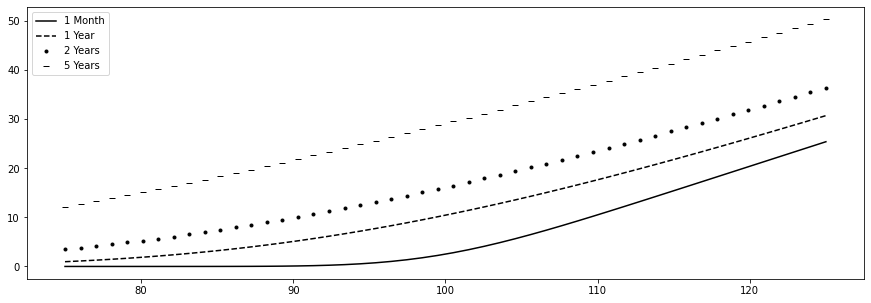

In [ ]:
#We define the plot size
fig = plt.figure(figsize=(15,5))

#We create a vector with spot values from 75 to 125
x=np.linspace(75,125)

#We plot all the moneyness with maturity 1/12 years
plt.plot(x, BS(x, 100, 1/12, 0.05, 0.20, 'call'), 'k', label='1 Month')
#We plot all the moneyness with maturity 1 year
plt.plot(x, BS(x, 100, 1, 0.05, 0.20, 'call'), 'k--', label='1 Year')
#We plot all the moneyness with maturity 2 years
plt.plot(x, BS(x, 100, 2, 0.05, 0.20, 'call'), 'k.', label='2 Years')
#We plot all the moneyness with maturity 5 years
plt.plot(x, BS(x, 100, 5, 0.05, 0.20, 'call'), 'k_', label='5 Years')
#We write the legend
plt.legend()
#We show the plot
plt.show()

We can see the option's value surface as a variable of time and strike 

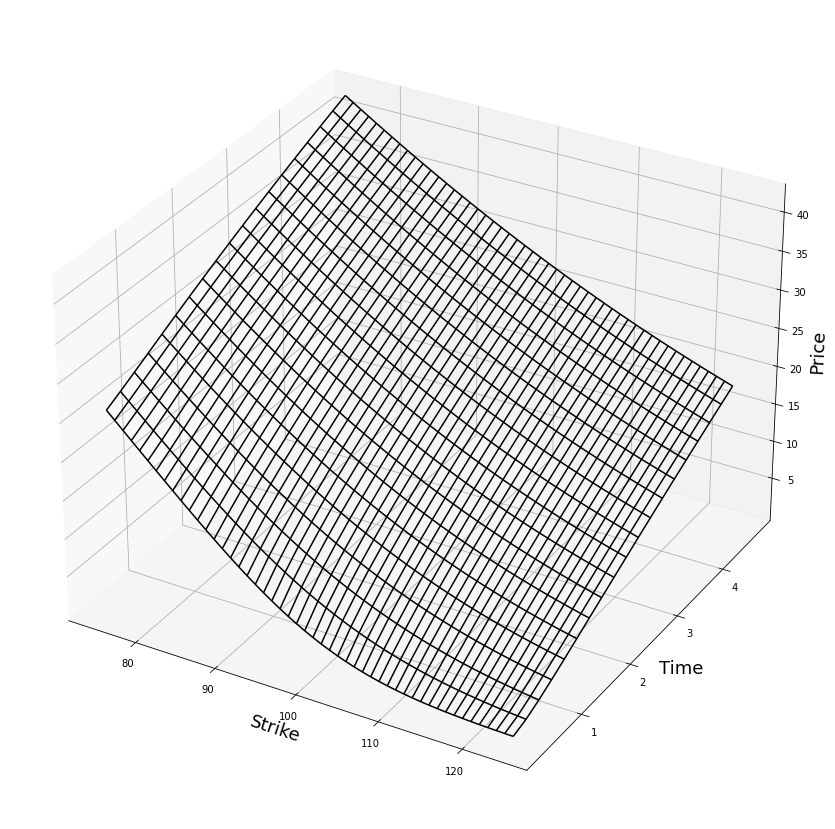

In [ ]:
#Define the plot size
fig = plt.figure(figsize=(25,15))

# Make data

#Create a vector with spot values from 75 to 125
X = np.arange(75, 125, 1)

#Create a vector with time values from 0.25 to 10
Y = np.arange(0.25, 5, 0.25)

#Combine
X, Y = np.meshgrid(X, Y)

#Evaluate the BS formula in these cases
Z = BS(100, X, Y, 0.05, 0.20, 'call')

#Prepare the 3D plot
ax = plt.axes(projection='3d')
surf=ax.plot_wireframe(X, Y, Z, color='black')

# Set axes label
ax.set_xlabel('Strike', fontsize=18)
ax.set_ylabel('Time', fontsize=18)
ax.set_zlabel('Price', fontsize=18)

plt.show()

## Comparison of the Binomial Model and Black-Scholes-Merton

We use the European Options code shown in Chapter 5.
We change the variables we return, in this case, we only return the option value. In Chapter 5, we return all the variables to help the student to contrast the values with their own calculations.

In [ ]:
#Function to obtain prices on a Binomial model
#As well as the Intrinsic option values

#We upload the maths library
import numpy as np

def EuBinomial(S,K,r,sigma,T,n,otype):
#This function calculate the up, down ratio
#and the risk-neutral probability

#Inputs: 
#r: risk-free rate
#sigma: volatility
#T: Maturity time
#n: number of steps
 

    # We calculate the time step size
    dt=T/n

    #We apply the u and d formulation
    u=np.exp(sigma*np.sqrt(dt))
    d=1/u

    #Then, we calculate the risk-neutral probability
    p=(np.exp(r*dt) -d)/(u-d)
    
    #We create a matrix to store the prices
    Stree=np.zeros((n+1, n+1))
    
    #We create a matrix to store the intrinic value
    Intrinsic=np.zeros((n+1, n+1))
    
    #We create a matrix to store the option value
    Option=np.zeros((n+1, n+1))
    
    #For each path
    for j in range(0,n+1):
        #For each time step
        for i in range(0,j+1):
            #The nodes are powers of u and d
            Stree[i,j] = S*(u**(j-i))*(d**(i))
            
            #Depending if is a call or a put
            #we apply a different payoff function
            if otype=="call":
                Intrinsic[i,j]=np.maximum(Stree[i,j]-K,0)
            elif otype=="put":
                Intrinsic[i,j]=np.maximum(K-Stree[i,j],0)
            else:
                print("Wrong option type. Please write call or put")
            
      
    #For each path
    for j in range(n,-1,-1):
        #For each time step
         for i in range(0, j+1):
            if j==n:
                Option[i,j] = Intrinsic[i,j]
            else:
                Option[i,j] = np.exp(-r*dt)*(Option[i,j+1]*p\
                                             + Option[i+1,j+1]*(1-p))         
    
    return (Option[0,0])

We compare the Binomial model when the time steps increases with the Black-Scholes-Merton option

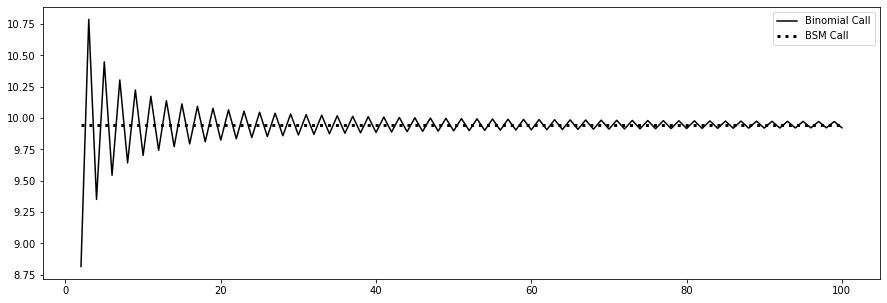

In [ ]:
#We create a value to save all the Binomial model values
values=np.zeros((99))

#We define the initial values
S=100
K=100
r=0
sigma=0.25
T=1
otype="call"

#With a for, we evaluate the Binomial model
# with different steps. In particular, from
# 2 to 100
for i in range(2,101):
    values[i-2]=EuBinomial(S,K,r,sigma,T,i,otype)

#We create a figure
fig = plt.figure(figsize=(15,5))
#We plot all the values of the Binomial model
plt.plot(np.arange(2, 101, 1), values, 'k', label='Binomial Call')
#We plot a constant line with the value of the BS price
plt.hlines(y=BS(100, 100, 1, 0.00, 0.25, 'call'),xmin=2, xmax=100,\
 linewidth=3,linestyles=':', color='k', label='BSM Call')
#We write the legend
plt.legend()
#We show the plot
plt.show()

## The Greeks

## Delta

The Delta is the sensitivity of the option price with respect to the asset price. In other words, the derivative with respect the price

In [ ]:
#We load the packages we are going to use
import numpy as np
import scipy.stats as ss

#We define d1 and d2 as separate functions.
#The idea is to use it for the BSM as well as the Greeks

def d1(S0,K,r,sigma,T):
    #Function to calculate d1
    #S0: Spot price
    #K: Strike price
    #r: risk-free rate
    #sigma: volatility
    #T: Time to maturity
    return (np.log(S0/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))

def d2(S0,K,r,sigma,T):
    #Function to calculate d2
    #S0: Spot price
    #K: Strike price
    #r: risk-free rate
    #sigma: volatility
    #T: Time to maturity
    return(np.log(S0/K)+(r-sigma**2/2)*T)/(sigma*np.sqrt(T))

def DeltaCall(S0,K,r,sigma,T):
    #Function to calcula the call option delta
    #S0: Spot price
    #K: Strike price
    #r: risk-free rate
    #sigma: volatility
    #T: Time to maturity
    return ss.norm.cdf(d1(S0,K,r,sigma,T))

ATM Delta of a call as a function of T

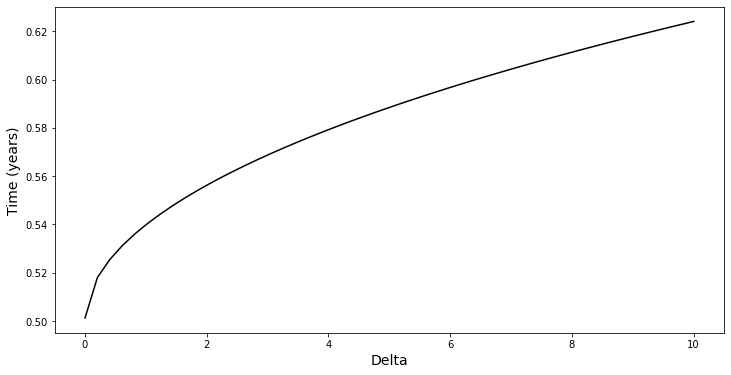

In [ ]:
#We create a figure
fig = plt.figure(figsize=(12,6))

#We plot the Call option delta for a maturity grid
#between 0.01 and 10years
plt.plot(np.linspace(0.001,10), \
         DeltaCall(100,100,0,0.2,np.linspace(0.001,10)), 'k')

#We write a label on the x-axis
plt.xlabel('Delta', fontsize=14)

#We write a label on the y-axis
plt.ylabel('Time (years)', fontsize=14)

#We show the plot
plt.show()

In-the-money Delta (S_0=110) of a call as a function of T

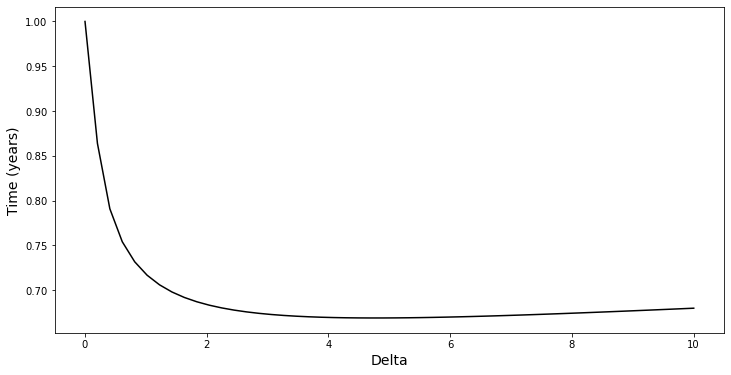

In [ ]:
#We create a figure
fig = plt.figure(figsize=(12,6))

#We plot the Call option delta for a maturity grid
#between 0.01 and 10years
plt.plot(np.linspace(0.001,10), \
         DeltaCall(110,100,0,0.2,np.linspace(0.001,10)), 'k')

#We write a label on the x-axis
plt.xlabel('Delta', fontsize=14)

#We write a label on the y-axis
plt.ylabel('Time (years)', fontsize=14)

#We show the plot
plt.show()

Out-of-the-money Delta (S_0=90) of a call as a function of $T$

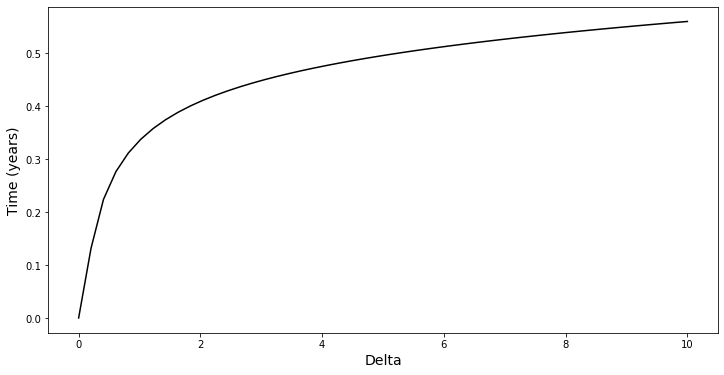

In [ ]:
#We create a figure
fig = plt.figure(figsize=(12,6))

#We plot the Call option delta for a maturity grid
#between 0.01 and 10years
plt.plot(np.linspace(0.001,10), \
         DeltaCall(90,100,0,0.2,np.linspace(0.001,10)), 'k')

#We write a label on the x-axis
plt.xlabel('Delta', fontsize=14)

#We write a label on the y-axis
plt.ylabel('Time (years)', fontsize=14)

#We show the plot
plt.show()

Call option delta as a function of strike (or moneyness) and time

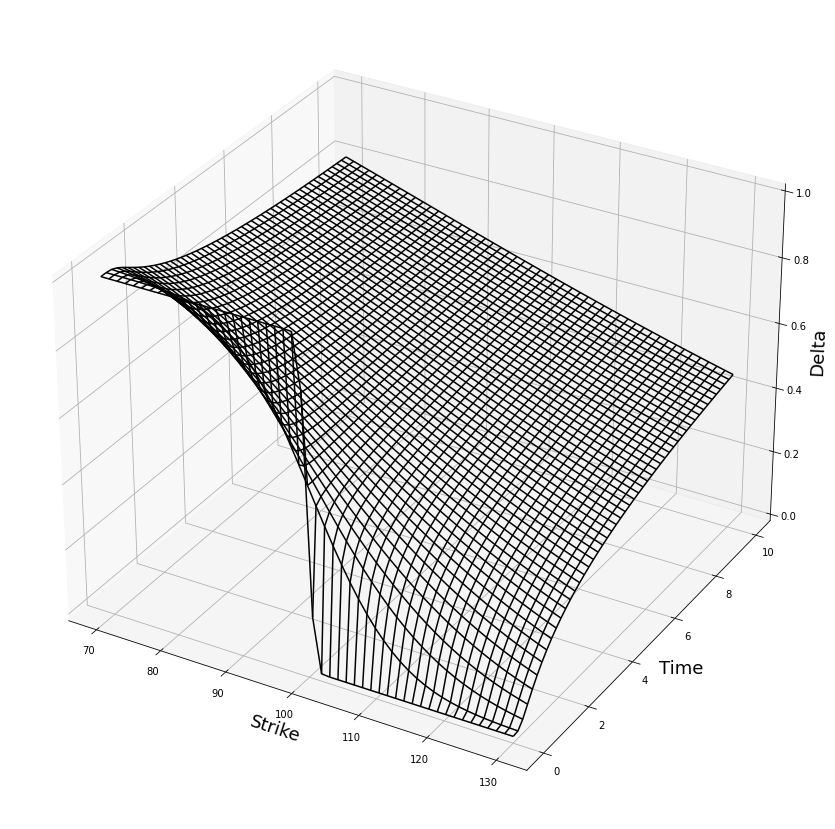

In [ ]:
#Define the plot size
fig = plt.figure(figsize=(20,15))

# Make data

#Create a vector with strike values from 70 to 130
X = np.linspace(70, 130)

#Create a vector with time values from 0.001 to 10
Y = np.linspace(0.001, 10)

#Combine
X, Y = np.meshgrid(X, Y)

#Evaluate the Call option delta in these cases
Z = DeltaCall(100,X,0,0.2,Y)

ax = plt.axes(projection='3d')
surf=ax.plot_wireframe(X, Y, Z, color='black')

# Set axes label
ax.set_xlabel('Strike', fontsize=18)
ax.set_ylabel('Time', fontsize=18)
ax.set_zlabel('Delta', fontsize=18)


plt.show()

## Theta

Theta is the derivative of the option price with respect to the passage of time

In [ ]:
def ThetaPut(S0, K, r, sigma, T):
    #Function to calculate Put option theta
    #S0: Spot price
    #K: Strike price
    #r: risk-free rate
    #sigma: volatility
    #T: Time to maturity
    
    #We calculate the probality density func.
    pdf=ss.norm.pdf(d1(S0,K,r,sigma,T))
    
    #We calculate the cummulative density func.
    cdf=ss.norm.cdf(-d2(S0,K,r,sigma,T))   
    
    return -S0*sigma/(2*np.sqrt(T))*pdf+ r*K*np.exp(-r*T)*cdf

Put option theta as a function of S_0

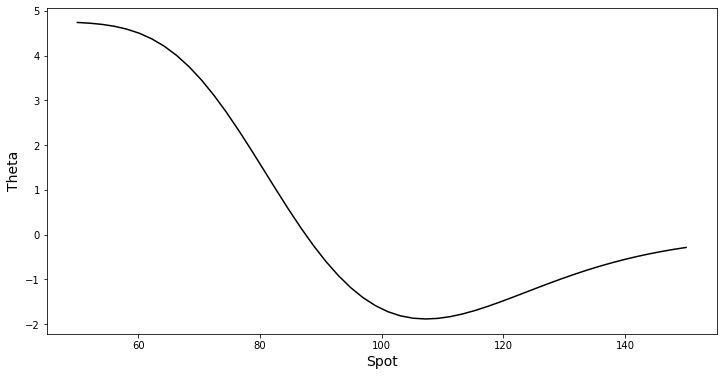

In [ ]:
#We create a figure
fig = plt.figure(figsize=(12,6))

#We plot the Put option theta for a grid of strikes
plt.plot(np.linspace(50,150),\
         ThetaPut(np.linspace(50,150),100,0.05,0.2,1), 'k')

#We write a label on the x-axis
plt.xlabel('Spot', fontsize=14)

#We write a label on the y-axis
plt.ylabel('Theta', fontsize=14)

#We show the plot
plt.show()

Put option theta surface

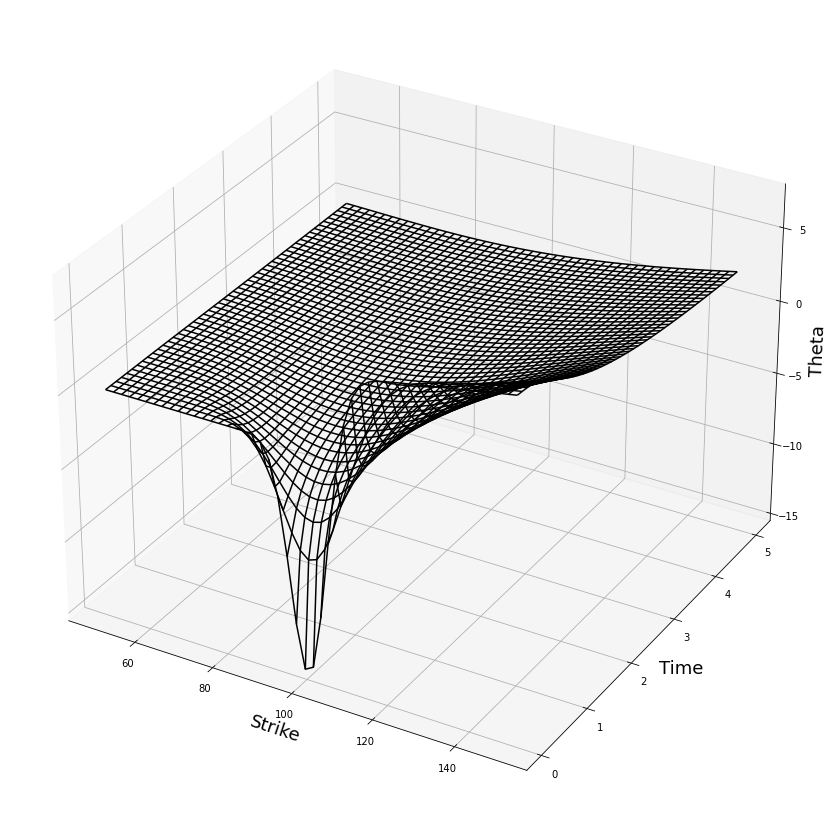

In [ ]:
#Define the plot size
fig = plt.figure(figsize=(20,15))

# Make data

#Create a vector with strike values from 50 to 150
X = np.linspace(50, 150)

#Create a vector with time values from 0.05 to 5
Y = np.linspace(0.05, 5)

#Combine
X, Y = np.meshgrid(X, Y)

#Evaluate the Put option theta in these cases
Z = ThetaPut(100,X, 0.05,0.2,Y)

ax = plt.axes(projection='3d')
surf=ax.plot_wireframe(X, Y, Z, color='black')

# Set axes label
ax.set_xlabel('Strike', fontsize=18)
ax.set_ylabel('Time', fontsize=18)
ax.set_zlabel('Theta', fontsize=18)

plt.show()

## Gamma

Gamma is the second derivative of the option price with respect to S_0. That is, it is the derivative of the Delta with respect to S_0.

In [ ]:
def Gamma(S0, K, r, sigma, T):
    #Function to calculate option's gamma
    #S0: Spot price
    #K: Strike price
    #r: risk-free rate
    #sigma: volatility
    #T: Time to maturity
    
    #We calculate the probality density func.
    pdf=ss.norm.pdf(d1(S0,K,r,sigma,T))
    
    return pdf/(S0*sigma*np.sqrt(T))

Gamma as a function of the Strike 

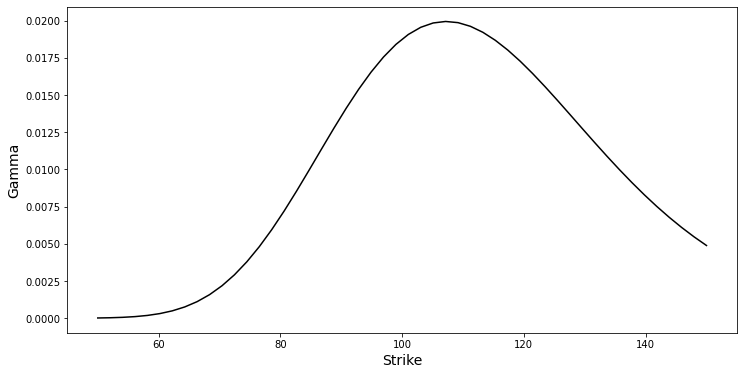

In [ ]:
#We create a figure
fig = plt.figure(figsize=(12,6))

#We plot the Call option gamma for a grid of strikes
plt.plot(np.linspace(50,150),\
         Gamma(100,np.linspace(50,150),0.05,0.2,1), 'k')

#We write a label on the x-axis
plt.xlabel('Strike', fontsize=14)

#We write a label on the y-axis
plt.ylabel('Gamma', fontsize=14)

#We show the plot
plt.show()

Gamma as a function of time to maturity

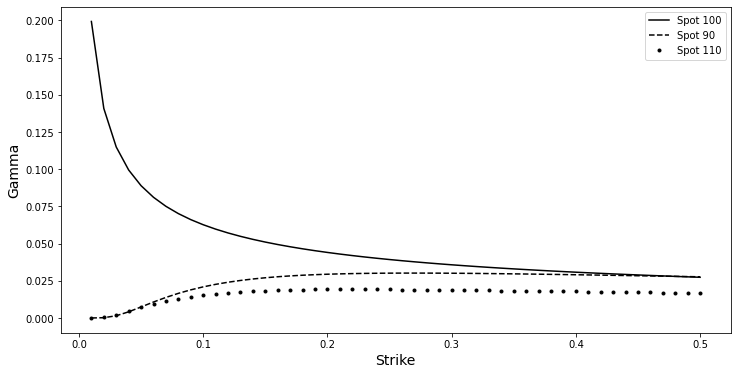

In [ ]:
#We create a figure
fig = plt.figure(figsize=(12,6))

#We plot the Call option delta for a grid of maturities between 0.01 and 0.5years
plt.plot(np.linspace(0.01,0.5),\
         Gamma(100,100,0.05,0.2,np.linspace(0.01,0.5)), 'k', label='Spot 100')

plt.plot(np.linspace(0.01,0.5),\
         Gamma(90,100,0.05,0.2,np.linspace(0.01,0.5)),  'k--', label='Spot 90')

plt.plot(np.linspace(0.01,0.5),\
         Gamma(110,100,0.05,0.2,np.linspace(0.01,0.5)), 'k.', label='Spot 110')

#We write a label on the x-axis
plt.xlabel('Strike', fontsize=14)

#We write a label on the y-axis
plt.ylabel('Gamma', fontsize=14)

plt.legend()

#We show the plot
plt.show()

Option's Gamma surface

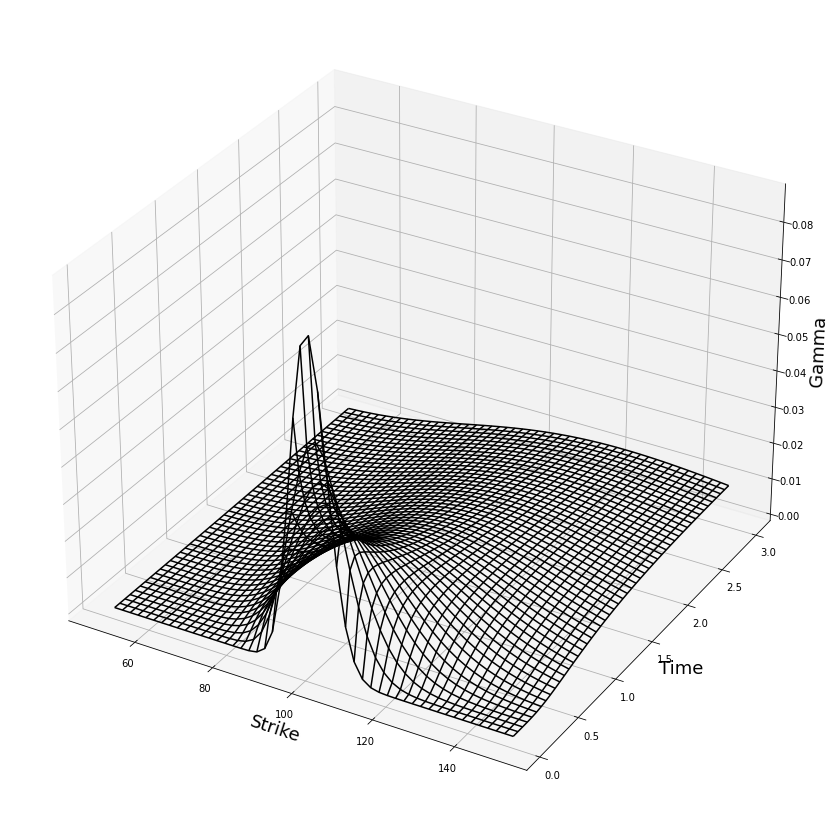

In [ ]:
#Define the plot size
fig = plt.figure(figsize=(20,15))

# Make data

#Create a vector with strike values from 70 to 130
X = np.linspace(50, 150)

#Create a vector with time values from 0.25 to 10
Y = np.linspace(0.05, 3)

#Combine
X, Y = np.meshgrid(X, Y)

#Evaluate the BS formula in these cases
Z = Gamma(100,X, 0.05,0.2,Y)

ax = plt.axes(projection='3d')
surf=ax.plot_wireframe(X, Y, Z, color='black')

# Set axes label
ax.set_xlabel('Strike', fontsize=18)
ax.set_ylabel('Time', fontsize=18)
ax.set_zlabel('Gamma', fontsize=18)

plt.show()

## Vega

Vega is the derivative of the option price with respect to the volatility parameter.

In [ ]:
def vega(S0, K, r, sigma, T):
    #Function to calculate option's vega
    #S0: Spot price
    #K: Strike price
    #r: risk-free rate
    #sigma: volatility
    #T: Time to maturity
    
    #We calculate the probality density func.
    pdf=ss.norm.pdf(d1(S0,K,r,sigma,T))
    
    return pdf*S0*np.sqrt(T)

Vega as a function of time to maturity

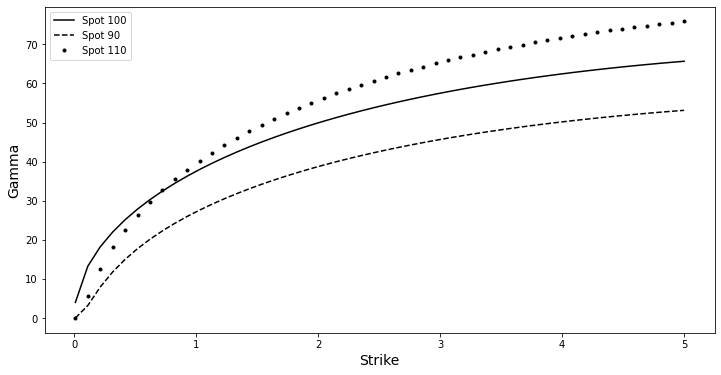

In [ ]:
#We create a figure
fig = plt.figure(figsize=(12,6))

#We plot the option vega for a grid of maturities between 0.01 and 5 years
plt.plot(np.linspace(0.01,5),\
         vega(100,100,0.05,0.2,np.linspace(0.01,5)), 'k', label='Spot 100')

plt.plot(np.linspace(0.01,5),\
         vega(100,90,0.05,0.2,np.linspace(0.01,5)),  'k--', label='Spot 90')

plt.plot(np.linspace(0.01,5),\
         vega(100,110,0.05,0.2,np.linspace(0.01,5)), 'k.', label='Spot 110')

#We write a label on the x-axis
plt.xlabel('Strike', fontsize=14)

#We write a label on the y-axis
plt.ylabel('Gamma', fontsize=14)

plt.legend()

#We show the plot
plt.show()

We zoom the short-term

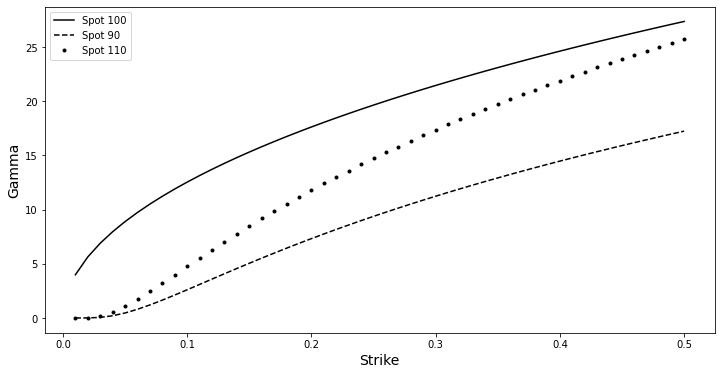

In [ ]:
#We create a figure
fig = plt.figure(figsize=(12,6))

#We plot the option vega for a grid of maturities between 0.01 and 0.55 years
plt.plot(np.linspace(0.01,0.5),\
         vega(100,100,0.05,0.2,np.linspace(0.01,0.5)), 'k', label='Spot 100')

plt.plot(np.linspace(0.01,0.5),\
         vega(100,90,0.05,0.2,np.linspace(0.01,0.5)),  'k--', label='Spot 90')

plt.plot(np.linspace(0.01,0.5),\
         vega(100,110,0.05,0.2,np.linspace(0.01,0.5)), 'k.', label='Spot 110')

#We write a label on the x-axis
plt.xlabel('Strike', fontsize=14)

#We write a label on the y-axis
plt.ylabel('Gamma', fontsize=14)

plt.legend()

#We show the plot
plt.show()

Vega as a function of the strike at the short-term

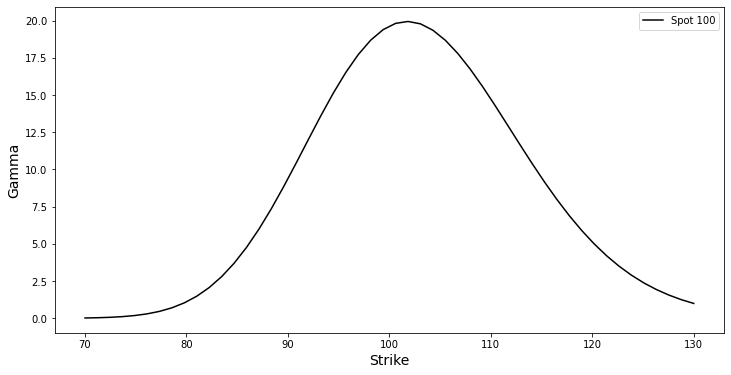

In [ ]:
#We create a figure
fig = plt.figure(figsize=(12,6))

#We plot the option vega for a grid of strikes between 70 and 130 at the short-term
plt.plot(np.linspace(70,130),\
         vega(100,np.linspace(70,130),0.05,0.2,0.25), 'k', label='Spot 100')

#We write a label on the x-axis
plt.xlabel('Strike', fontsize=14)

#We write a label on the y-axis
plt.ylabel('Gamma', fontsize=14)

plt.legend()

#We show the plot
plt.show()

In [ ]:
Vega as a function of the strike at the long-term

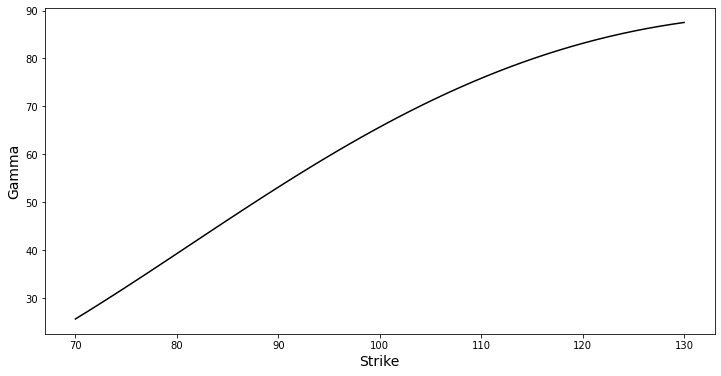

In [ ]:
#We create a figure
fig = plt.figure(figsize=(12,6))

#We plot the option vega for a grid of strikes between 70 and 130 at the long-term
plt.plot(np.linspace(70,130),\
         vega(100,np.linspace(70,130),0.05,0.2,5), 'k')

#We write a label on the x-axis
plt.xlabel('Strike', fontsize=14)

#We write a label on the y-axis
plt.ylabel('Gamma', fontsize=14)

#We show the plot
plt.show()

Vega's option surface

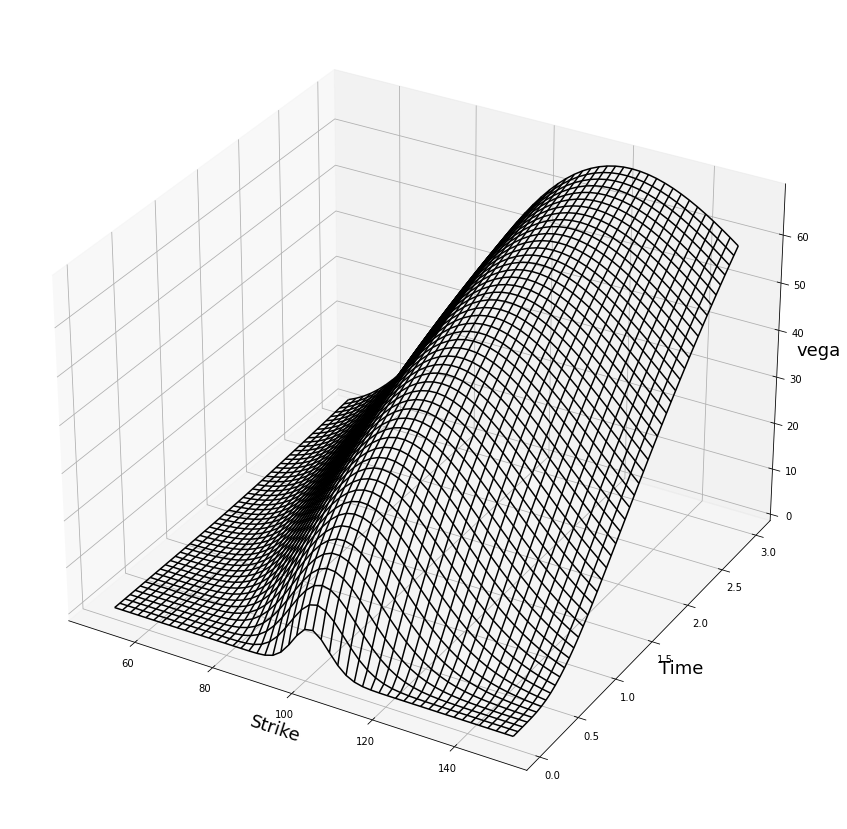

In [ ]:
#Define the plot size
fig = plt.figure(figsize=(20,15))

# Make data

#Create a vector with strike values from 70 to 130
X = np.linspace(50, 150)

#Create a vector with time values from 0.25 to 10
Y = np.linspace(0.05, 3)

#Combine
X, Y = np.meshgrid(X, Y)

#Evaluate the BS formula in these cases
Z = vega(100,X, 0.05,0.2,Y)

ax = plt.axes(projection='3d')
surf=ax.plot_wireframe(X, Y, Z, color='black')

# Set axes label
ax.set_xlabel('Strike', fontsize=18)
ax.set_ylabel('Time', fontsize=18)
ax.set_zlabel('vega', fontsize=18)

plt.show()